<h1 align="center">Used Car Price Prediction</h1> 

<h3 align="center">Linear Regression</h3> 

---------------------------------------------------------------------------------------------------------------------------

### Importing Relevent library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
car = pd.read_csv('C:/Users/sandi/OneDrive/Car csv/Car_preproccesed.csv')

car.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression


In [3]:
# Declareig the feature and target variable
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))

### Scaling the data


Note: It is not alwayes consider best practics to scale the dummy variable.beause once they scale they lose all the information. but here I will  neglect that. and will consider every column are seperate features.

In [4]:
from sklearn.preprocessing import StandardScaler

# create instance of scaler
scaler = StandardScaler()

# scaling the data
X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.2179077 , -0.09726593,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201, -0.09726593, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.78125977, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.86224264, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  0.86224264,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.09726593, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]], shape=(3867, 17))

In [5]:
# checking the first row of scaling data.
X_scaled[0] # here i can see that all dummies `0` and `1` are gone.

array([ 1.2179077 , -0.09726593,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

### train_test_split


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [7]:
# Creating the regression 
from sklearn.linear_model import LinearRegression

# create instane of model
reg = LinearRegression()

# fit the datab
model = reg.fit(X_train, y_train)

In [8]:
model.predict(X_test)

array([ 9.34705687,  8.03902778,  9.55891393,  8.77487439,  7.94488352,
        9.50767739,  9.02053573,  9.55910906,  8.33587901,  8.52373062,
        9.03701993, 10.08579027,  8.24071734,  9.02343094,  9.658732  ,
        8.64122773,  8.85852433,  9.04800642,  8.41228012,  8.03113511,
        8.22697637,  8.58791042,  8.7381683 ,  9.0845396 , 10.05055801,
        8.80443096,  9.62014161,  8.6425359 ,  8.71393315,  9.25620966,
        8.73964935,  9.24956966,  9.14386534,  8.37501392,  8.88647009,
        8.26575151,  8.68131213,  8.97790707,  8.84219028, 10.01615255,
        8.17330036,  9.12354692,  8.34043294,  9.48262257,  7.74572825,
        9.7682017 ,  8.66725584, 10.18019189,  9.1900079 ,  9.11994626,
        8.28456303,  8.5632143 ,  8.47614973,  8.51500936,  8.79679679,
        8.8978412 ,  9.03585243,  9.67856087,  8.65092179, 10.27923707,
        9.37633115, 10.47185712,  8.67089961,  9.17234436,  9.06135548,
        9.40984875,  8.73261699,  9.87505531,  8.36601307,  8.57

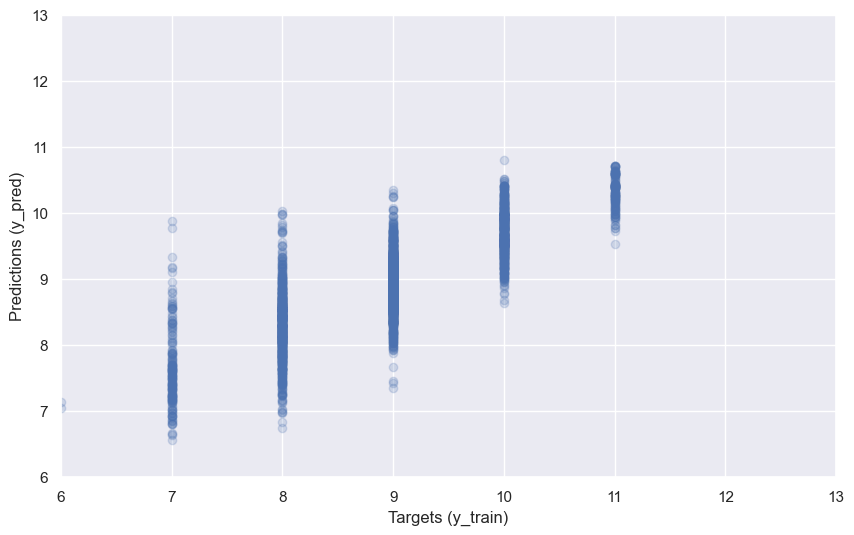

In [9]:
# Evaluate the base Linear regression model

# check the prediction with the original values
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.xlim(6,13);
plt.ylim(6,13);

The traning prediction looks good, it is not completely random, i can observe the linearity on the plot

Another way to check the `Residual` which is difference between thetargets and the predictions.

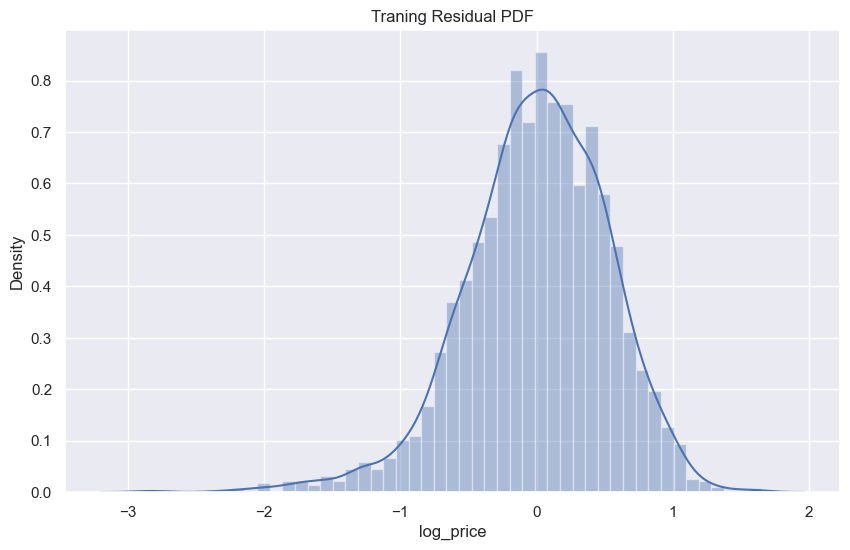

In [10]:
# plotting the distribution of the residual
residual_train = (y_train - y_pred_train)

# ploting the distribution of the residual
plt.figure(figsize=(10,6))
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

From this plot i can observe that the most of the value are lie on the near `0` as the mean is `0` i meaas the model is worked better, as most of the difference is `0`, the model is make the prediction as it is on the target value.

In [11]:
# Checking the r2_score
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.6837495926853566

In [12]:
# Checkinht the rmse
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

np.float64(7832.180579277522)

The min and max price was `800` and `129222` on the data set and our model make error `10165`. 

The model i have created is not excelent but also not that much bad.

Our model is defining 75% of the variability from the data.

### Now i will look at the weight and bias


In [13]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.463477
1,EngineV,0.234241
2,Brand_BMW,0.007984
3,Brand_Mercedes-Benz,-0.007144
4,Brand_Mitsubishi,-0.134828
5,Brand_Renault,-0.184100
6,Brand_Toyota,-0.041023
7,Brand_Volkswagen,-0.074420
8,Body_hatch,-0.130260
9,Body_other,-0.087997


Now this will be not a generalize model because i violate a rule by scaling the dummy variable, but here i will explane the weights what i have got.

`positive_weights` = feature increase value also the price will be increase.

`negative_weights` = feature increase value but the price will decrease.

## Now evaluate on Testing data

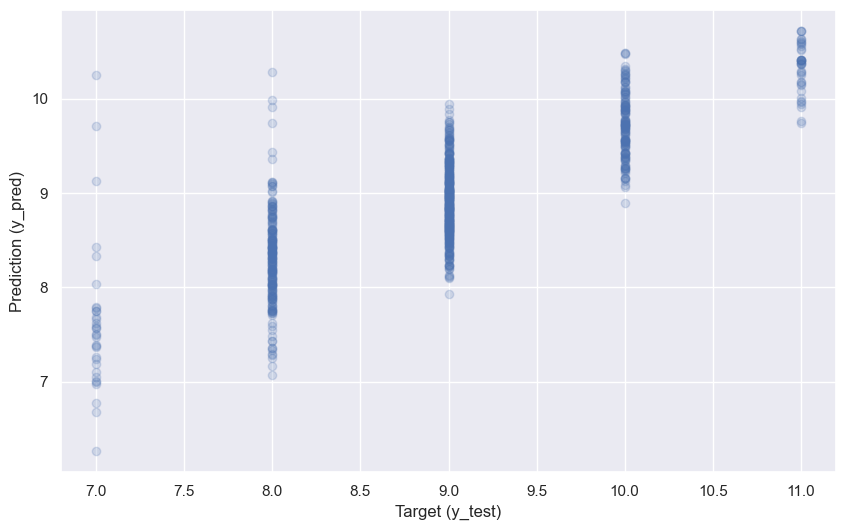

In [14]:
# predict on test data

y_pred = reg.predict(X_test)

# potting the graph
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2);


plt.xlabel('Target (y_test)');
plt.ylabel('Prediction (y_pred)');

In [15]:
# checking the rmse on test data
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

np.float64(8004.367604289711)

On test data it make `11692` error, this is telling that the model can be performed not that good but it is also not overfit as it behave same on traning and testing data

In [16]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction']) # np.exp will reverse the log_tranformation 
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = np.exp(y_test)

# checking the performance data 
df_eval

,Prediction,Tareget
0,11465.030630,8103.083928
1,3099.598242,2980.957987
2,14170.447802,8103.083928
3,6469.631218,8103.083928
4,2821.103835,2980.957987
...,...,...
769,25348.464684,59874.141715
770,4010.325699,8103.083928
771,10431.900213,22026.465795
772,6725.476329,8103.083928


In [17]:
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)

# checking the data performance
df_eval

,Prediction,Tareget,Residual,Difference%
0,11465.030630,8103.083928,-3361.946703,41.489718
1,3099.598242,2980.957987,-118.640255,3.979937
2,14170.447802,8103.083928,-6067.363875,74.877219
3,6469.631218,8103.083928,1633.452710,20.158408
4,2821.103835,2980.957987,159.854152,5.362509
...,...,...,...,...
769,25348.464684,59874.141715,34525.677031,57.663753
770,4010.325699,8103.083928,4092.758228,50.508649
771,10431.900213,22026.465795,11594.565582,52.639246
772,6725.476329,8103.083928,1377.607599,17.001028


Now this table tell a lot.

In [18]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,9971.790929,11757.062422,1785.271493,48.454059
std,8009.668867,13022.388601,7807.782530,118.598709
min,526.057052,1096.633158,-27104.235703,0.023524
25%,4744.588798,2980.957987,-1574.828002,15.438580
50%,7266.429578,8103.083928,348.316562,31.706210
75%,12429.306513,8103.083928,2855.786043,50.991524
max,45166.138688,59874.141715,42870.152181,2471.586373


In [19]:
# getting all values.
pd.options.display.max_rows = 999
# setting all value two digits after dot.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

,Prediction,Tareget,Residual,Difference%
726,8101.18,8103.08,1.91,0.02
626,8114.44,8103.08,-11.36,0.14
347,8116.88,8103.08,-13.79,0.17
535,2993.42,2980.96,-12.46,0.42
145,8139.24,8103.08,-36.16,0.45
447,21926.92,22026.47,99.54,0.45
764,1090.45,1096.63,6.18,0.56
114,8151.10,8103.08,-48.01,0.59
512,8164.41,8103.08,-61.32,0.76
149,8038.50,8103.08,64.58,0.80


The Note here is the higher difference is on the lower price car. as i can see the residual are all negative. means the model is predicted far away from the original value. as i observe on the `Residual` PDF plot the tail was on the negative side. this is more tabular version of that.

It is telling me the i have missing something that the price of the car is lower but my model think it will be higher.

It can be becaus the `Model` column that i removed in intial stage. or maby the car is broken but that information i dont have.

The next thing is creating another model and keep the `Model` Column